# NanoBanana

In [10]:
from openai import OpenAI
import os
from pydantic import SecretStr

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY")
)

In [14]:
# Generate an image
response = client.chat.completions.create(
  model="google/gemini-3-pro-image-preview",
  messages=[
          {
            "role": "user",
            "content": "Generate a blackboard summary of the transformer architecture"
          }
        ],
  extra_body={"modalities": ["image", "text"]}
)

# The generated image will be in the assistant message
response = response.choices[0].message
if response.images:
  for image in response.images:
    image_url = image['image_url']['url']  # Base64 data URL
    print(f"Generated image: {image_url[:50]}...")

Generated image: data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAEsAAD...
Generated image: data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAEsAAD...


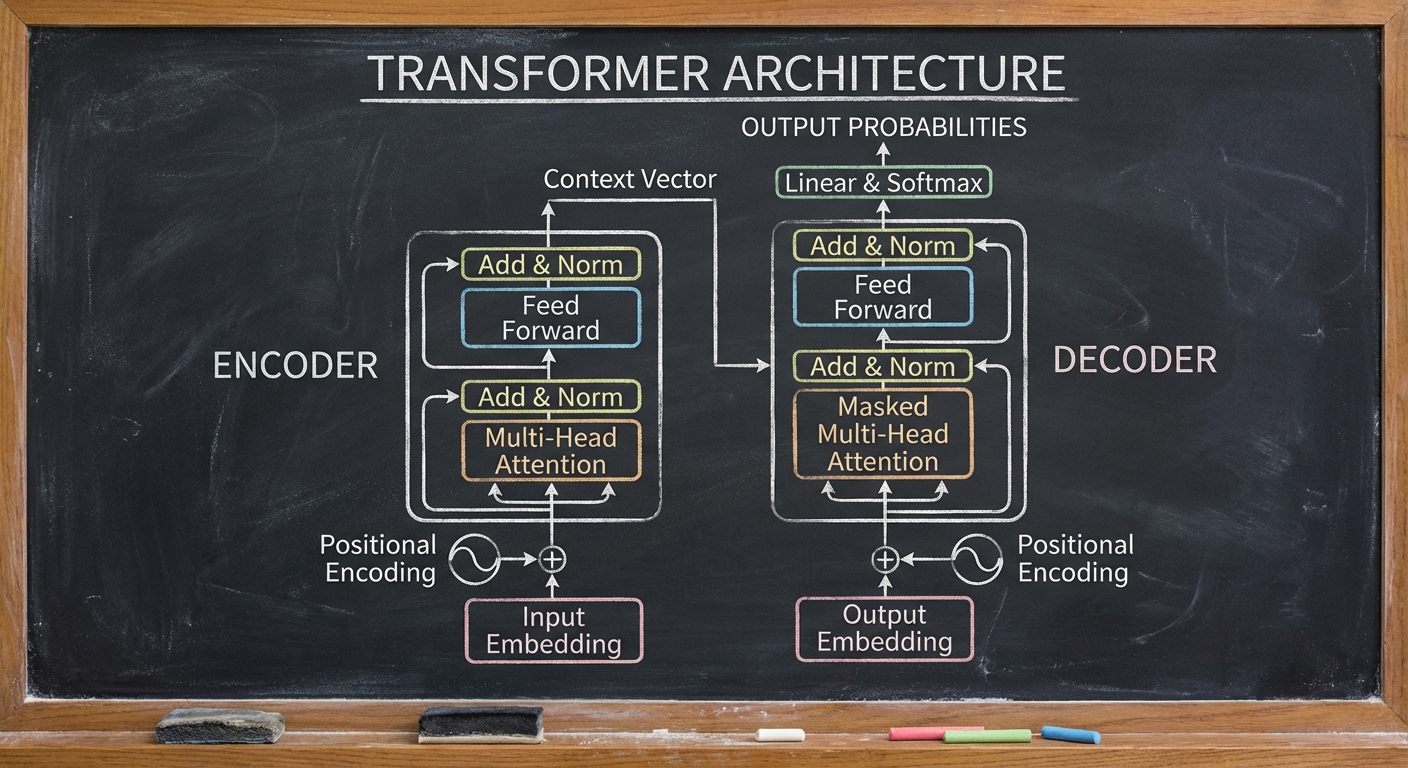

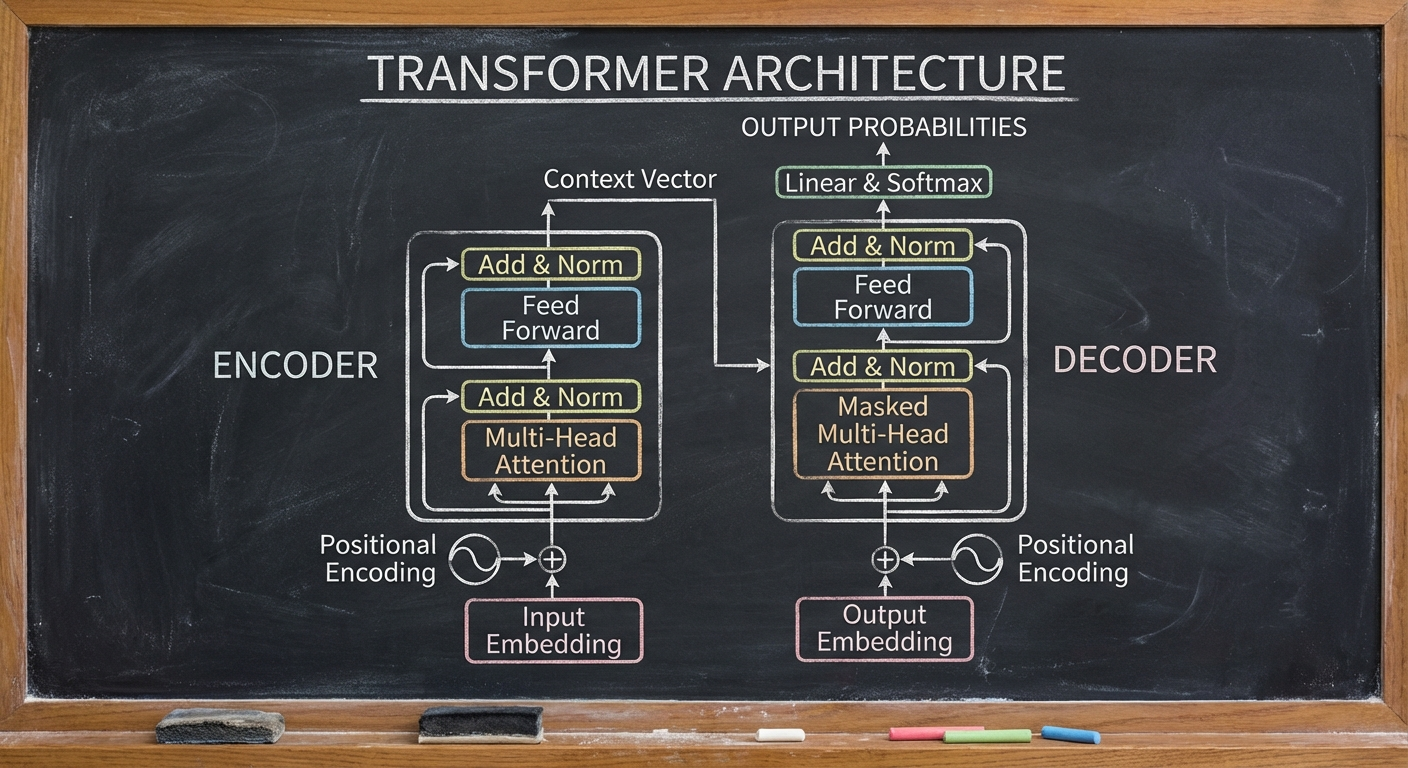

In [15]:
from IPython.display import Image, display
import base64

# Se hai già image_url dalla cella precedente
if response.images:
    for image in response.images:
        image_url = image['image_url']['url']  # data:image/jpeg;base64,...
        
        # Estrai la parte base64 (dopo la virgola)
        base64_data = image_url.split(',')[1]
        
        # Decodifica e visualizza
        image_bytes = base64.b64decode(base64_data)
        display(Image(image_bytes))